In [1]:
import os
os.chdir('D:\OneDrive\codelib\PycharmProjects\ds2_2324\data_aux')
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import numpy as np
import pandas as pd
from IPython.display import display
import math
import matplotlib
import matplotlib.pyplot as plt
import statistics
import csv
#import graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
#from id3 import Id3Estimator, export_graphviz, export_text
from scipy import stats
import scipy.spatial.distance as dist
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree, linkage
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import DistanceMetric
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_1012\522701042.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', None)

In [3]:
missing_values = ['n/a', 'na', 'nan', 'N/A', 'NA', 'NaN', 'NAN', '--', 'Missing', 'missing', 'Unknown', 'unknown', 'UNKNOWN']

# 4. ANN IN PYTHON

In [4]:
#first install the tensorflow package
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax, RMSprop
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model

## AND example

In [6]:
# Step 1: Upload the dataset and inspect the data
and_data = pd.DataFrame({'P1': [0,1,0,1], 'P2': [0,0,1,1], 'Q' : [0,0,0,1]})
x_and_data = and_data[['P1', 'P2']]
y_and_data = and_data[['Q']]
print(x_and_data)
print(y_and_data)

   P1  P2
0   0   0
1   1   0
2   0   1
3   1   1
   Q
0  0
1  0
2  0
3  1


In [29]:
# Step 5: Build the ANN-model: Preparing the layers of the neural network
inputs_and = Input(shape=(2,))
x_and = Dense(2, activation='sigmoid')(inputs_and)  #sigmoid(x) = 1 / (1 + exp(-x)).
#x_and = Dense(4, activation='sigmoid')(x_and)
#x_and = Dense(8, activation='sigmoid')(x_and)
#x_and = Dense(16, activation='sigmoid')(x_and)
#x_and = Dense(32, activation='sigmoid')(x_and)
#x_and = Dense(16, activation='sigmoid')(x_and)
#x_and = Dense(8, activation='sigmoid')(x_and)
#x_and = Dense(4, activation='sigmoid')(x_and)
#x_and = Dense(2, activation='sigmoid')(x_and)
outputs_and = Dense(1, activation='sigmoid')(x_and)
#outputs_and = Dense(1, activation='sigmoid')(inputs_and)

In [30]:
# Step 5: Build the ANN-model: Build the neural network model
model_and = Model(inputs_and, outputs_and, name='AND_NN')
model_and.summary()
#plot_model(model_xor, to_file='model_xor_plot.png', show_shapes=True, show_layer_names=True)

Model: "AND_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model_and.compile(optimizer=Adam(learning_rate=0.001),
                  loss=keras.losses.binary_crossentropy,
                  metrics=['accuracy'])

In [32]:
# Step 6: Train the ANN-model
#from livelossplot import PlotLossesKeras
history_xor = model_and.fit(x_and_data, y_and_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 0.9012 - accuracy: 0.2500
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.9003 - accuracy: 0.2500
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.8994 - accuracy: 0.2500
Epoch 4/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.8984 - accuracy: 0.2500
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.8975 - accuracy: 0.2500
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.8966 - accuracy: 0.2500
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.8957 - accuracy: 0.2500
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.8948 - accuracy: 0.2500
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.8939 - accuracy: 0.2500
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.8930 - accuracy: 0.2500
Epoch 11/10

In [12]:
for lay in model_and.layers:
    print(lay.name)
    print(lay.get_weights())

input_1
[]
dense
[array([[-0.42074427],
       [-0.9671554 ]], dtype=float32), array([-0.09940187], dtype=float32)]


How to interprete weights?

For example, 1 hidden layer with 2 neurons, sigmoid activation in hidden layer, none activation in output layer:

From input to hidden layer: 4 weights of dense link to previous layer and 2 weights of biasses (constants)

biass    O    O
input 1  O -> O -> output
input 2  O    O

Example output of 5000 epochs
input_1
[]
dense
[array([[ 0.8496698 , -1.5709696 ],
       [ 0.07808454, -1.8291761 ]], dtype=float32), array([0.41726527, 1.849606  ], dtype=float32)]
dense_1
[array([[ 1.014158 ],
       [-2.5148451]], dtype=float32), array([0.63641393], dtype=float32)]


from input biass to hidden 1 : 0.41726527
from input biass to hidden 2 : 1.849606

from input 1 to hidden 1 :  0.8496698
from input 1 to hidden 2 : -1.5709696
from input 2 to hidden 1 :  0.07808454
from input 2 to hidden 2 : -1.8291761

From hidden layer to output: 2 weights of dense link to previous layer and 1 weight of bias (constant)

from hidden biass to output :  0.63641393
from hidden 1 to output :      1.014158
from hidden 2 to output :     -2.5148451

=> in hidden 1 = 0.41726527 + 0.8496698 x1      + 0.07808454 x2
=> in hidden 2 = 1.849606   - 1.5709696 x1      - 1.8291761  x2
=> in output =  0.63641393  + 1.014158 hidden 1 - 2.5148451 hidden 2

out = 1 / (1 + exp(-in)) (sigmoid function)

Example: x1 = 0 and x2 = 0

out input 1 = 0
out input 2 = 0

=> in hidden 1 = 0.41726527 => out hidden 1 = 0.602828
=> in hidden 2 = 1.849606   => out hidden 2 = 0.864081

=> in output = 0.63641393 + (1.014158 x 0.602828) - (2.5148451 x 0.864081)
             = 0.63641393 + 0.611363 - 2.173030
             = -0.925253
             
=> out output = -0.925253 => 0

In [ ]:
# Step 7: Evaluate the quality of the ANN-model
print(x_and_data)
print(model_and.predict(x_and_data))
print(model_and.evaluate(x_and_data, y_and_data))

## XOR example

In [6]:
###EXAMPLE 1: XOR###
# Step 1: Upload the dataset and inspect the data
xor_data = pd.DataFrame({'P1': [0,1,0,1], 'P2': [0,0,1,1], 'Q' : [0,1,1,0]})
x_xor_data = xor_data[['P1', 'P2']]
y_xor_data = xor_data[['Q']]
print(x_xor_data)
print(y_xor_data)

   P1  P2
0   0   0
1   1   0
2   0   1
3   1   1
   Q
0  0
1  1
2  1
3  0


In [13]:
# Step 5: Build the ANN-model: Preparing the layers of the neural network
inputs_xor = Input(shape=(2,))
x_xor = Dense(2, activation='sigmoid')(inputs_xor)  #sigmoid(x) = 1 / (1 + exp(-x)).
#x_xor = Dense(4, activation='sigmoid')(x_xor)
#x_xor = Dense(8, activation='sigmoid')(x_xor)
#x_xor = Dense(16, activation='sigmoid')(x_xor)
#x_xor = Dense(32, activation='sigmoid')(x_xor)
#x_xor = Dense(16, activation='sigmoid')(x_xor)
#x_xor = Dense(8, activation='sigmoid')(x_xor)
#x_xor = Dense(4, activation='sigmoid')(x_xor)
#x_xor = Dense(2, activation='sigmoid')(x_xor)
outputs_xor = Dense(1, activation='sigmoid')(x_xor)
#outputs_xor = Dense(1, activation='sigmoid')(inputs_xor)

In [14]:
# Step 5: Build the ANN-model: Build the neural network model
model_xor = Model(inputs_xor, outputs_xor, name='XOR_NN')
model_xor.summary()
#plot_model(model_xor, to_file='model_xor_plot.png', show_shapes=True, show_layer_names=True)

Model: "XOR_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model_xor.compile(optimizer=Adam(learning_rate=0.001),
                  loss=keras.losses.binary_crossentropy,
                  metrics=['accuracy'])

In [18]:
# Step 6: Train the ANN-model
#from livelossplot import PlotLossesKeras
history_xor = model_xor.fit(x_xor_data, y_xor_data, epochs=2000) #, callbacks=[PlotLossesKeras()], verbose=False)

Epoch 1/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.6646 - accuracy: 0.7500
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6645 - accuracy: 0.7500
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6644 - accuracy: 0.7500
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6643 - accuracy: 0.7500
Epoch 5/2000
1/1 [==============================] - 0s 18ms/step - loss: 0.6643 - accuracy: 0.7500
Epoch 6/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6642 - accuracy: 0.7500
Epoch 7/2000
1/1 [==============================] - 0s 39ms/step - loss: 0.6641 - accuracy: 0.7500
Epoch 8/2000
1/1 [==============================] - 0s 20ms/step - loss: 0.6640 - accuracy: 0.7500
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6639 - accuracy: 0.7500
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6638 - accuracy: 0.7500
Epoch 11/

In [17]:
for lay in model_xor.layers:
    print(lay.name)
    print(lay.get_weights())

input_2
[]
dense_1
[array([[ 4.0647954e-08],
       [-3.4383325e-07]], dtype=float32), array([1.667625e-07], dtype=float32)]


In [18]:
# Step 7: Evaluate the quality of the ANN-model
print(x_xor_data)
print(model_xor.predict(x_xor_data))
print(model_xor.evaluate(x_xor_data, y_xor_data))

   P1  P2
0   0   0
1   1   0
2   0   1
3   1   1
1/1 [==============================] - 0s 65ms/step
[[0.50000006]
 [0.50000006]
 [0.49999997]
 [0.49999997]]
1/1 [==============================] - 0s 133ms/step - loss: 0.6931 - accuracy: 0.5000
[0.6931471824645996, 0.5]


## Example MNIST

### Data preparation

In [5]:
###EXAMPLE 2: MNIST_Crusher###
# Step 1 & 4: Upload the dataset and split dataset
import keras.datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
### 60000 training images with 28x28 pixels and their associated number
print(x_train.shape)
print(y_train.shape)
### 10000 test images with 28x28 pixels and their associated number
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [20]:
x_train[5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  13,  25, 100, 122,   7,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create some random data; replace that by your actual dataset
data = x_train[0]

# plot heatmap
ax = sns.heatmap(data)

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
plt.savefig('seabornPandas.png', dpi=100)
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [21]:
y_train[0]

5

In [6]:
### Transform the 2D-images into 1D-vectors
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [23]:
### Targetvalues transformed into One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(60000, 10, 2)
(10000, 10, 2)


In [24]:
y_train[0]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [7]:
# Step 5: Build the ANN-model
### Preparing the layers of the neural network
inputs = Input(shape=(784,))
x = BatchNormalization()(inputs)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

In [28]:
### Build the neural network model
model = Model(inputs, outputs, name='MNIST_Crusher')
model.summary()
#plot_model(model, to_file='model_MNIST_plot.png', show_shapes=True, show_layer_names=True)
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

Model: "MNIST_Crusher"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 58186 (227.29 KB)
Trainable params: 56618 (221.16 KB)
Non-trainable params: 1568 (6.12 KB)
______________

In [29]:
# Step 6: Train the ANN-model
history = model.fit(
    x_train, # training data
    y_train, # training targets
    epochs=5,
    batch_size=32,
    validation_split=0.2,
)

Epoch 1/5
1500/1500 [==============================] - 12s 6ms/step - loss: 0.0691 - accuracy: 0.9769 - val_loss: 0.4935 - val_accuracy: 0.9633
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0603 - accuracy: 0.9799 - val_loss: 0.3051 - val_accuracy: 0.9640
Epoch 3/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0572 - accuracy: 0.9810 - val_loss: 0.4455 - val_accuracy: 0.9646
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0509 - accuracy: 0.9820 - val_loss: 0.4500 - val_accuracy: 0.9674
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0467 - accuracy: 0.9845 - val_loss: 0.4877 - val_accuracy: 0.9651


In [29]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2907 - accuracy: 0.9777


[0.2906701862812042, 0.977733314037323]

In [30]:
# Step 7: Evaluate the quality of the ANN-model
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7630 - accuracy: 0.9637


[0.7629883289337158, 0.963699996471405]

In [31]:
# Predict the first n images of the test dataset
print(np.argmax(model.predict(x_test[:20]),axis=1)) # [7 2 1 0 4 ...]
# compare with the actual numbers
print(np.argmax(y_test[:20], axis=1)) # [7 2 1 0 4 ...]

1/1 [==============================] - 0s 90ms/step
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [31]:
import matplotlib.pyplot as plt

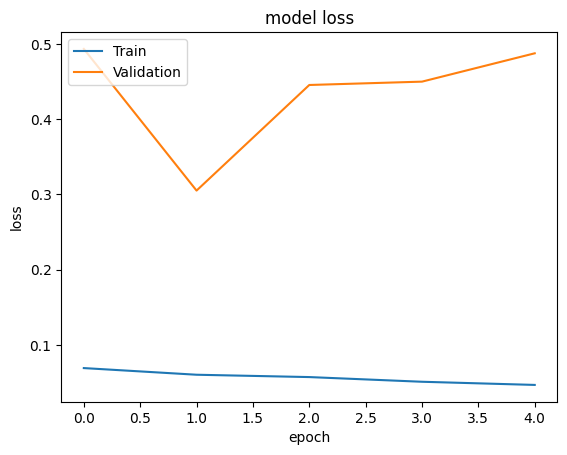

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

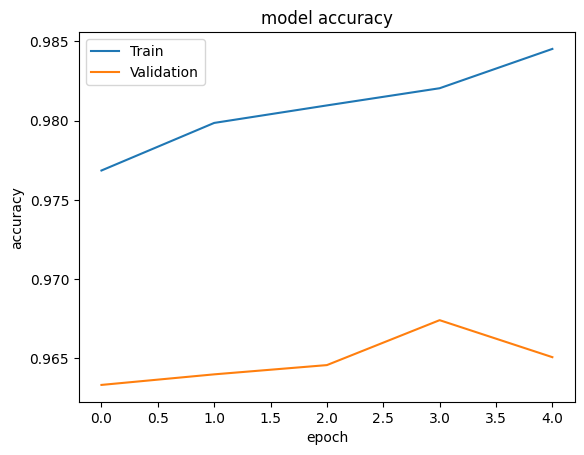

In [33]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Example Cereals

In [13]:
#Step 1: Upload the dataset and inspect the data
cereals = pd.read_csv('cereals US.csv',delimiter=';', decimal=',')
cereals.info()
cereals.isna().sum().sum()
cereals.describe()  #note: visualisation of values only for quantitative variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cereal Name            71 non-null     object 
 1   Manufacturer           71 non-null     object 
 2   Type                   71 non-null     object 
 3   Calories               71 non-null     int64  
 4   Protein (g)            71 non-null     int64  
 5   Fat                    71 non-null     int64  
 6   Sodium                 71 non-null     int64  
 7   Dietary Fiber          71 non-null     float64
 8   Carbs                  71 non-null     float64
 9   Sugars                 71 non-null     int64  
 10  Display Shelf          71 non-null     int64  
 11  Potassium              71 non-null     int64  
 12  Vitamins and Minerals  71 non-null     int64  
 13  Serving Size Weight    71 non-null     float64
 14  Cups per Serving       71 non-null     float64
 15  Rating  

,Calories,Protein (g),Fat,Sodium,Dietary Fiber,Carbs,Sugars,Display Shelf,Potassium,Vitamins and Minerals,Serving Size Weight,Cups per Serving,Rating
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,105.492958,2.507042,0.957746,161.760563,2.136620,14.563380,6.746479,2.169014,96.197183,28.873239,1.028592,0.616901,41.235073
std,18.806438,1.106774,0.962684,86.218570,2.444132,4.353102,4.403629,0.844916,69.823578,23.009271,0.154359,0.585422,16.411681
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,1.000000,15.000000,0.000000,0.500000,-1.000000,0.397034
25%,100.000000,2.000000,0.000000,135.000000,0.000000,12.000000,3.000000,1.000000,42.500000,25.000000,1.000000,0.585000,30.761530
50%,110.000000,2.000000,1.000000,180.000000,2.000000,14.000000,6.000000,2.000000,90.000000,25.000000,1.000000,0.750000,40.105965
75%,110.000000,3.000000,1.000000,220.000000,3.000000,17.000000,10.500000,3.000000,117.500000,25.000000,1.000000,1.000000,51.210293
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,3.000000,330.000000,100.000000,1.500000,1.500000,93.704912


In [14]:
# Step 2: Perform the needed data management manipulations
x_cereals = cereals[['Calories','Protein (g)', 'Fat', 'Sodium', 'Dietary Fiber']].copy()
y_cereals = cereals[['Rating']].copy()

In [15]:
# Step 3: Normalise the data
### min-max normalisation
def minmax_norm(col):
    minimum = col.min()
    range = col.max() - minimum
    return (col-minimum)/range

In [16]:
x_cereals_norm = pd.DataFrame()
for column in x_cereals:
    x_cereals_norm[column] = minmax_norm(x_cereals[column])
y_cereals_norm = minmax_norm(y_cereals)
print(x_cereals_norm.describe())
print(y_cereals_norm.describe())

        Calories  Protein (g)        Fat     Sodium  Dietary Fiber
count  71.000000    71.000000  71.000000  71.000000      71.000000
mean    0.504481     0.301408   0.191549   0.505502       0.152616
std     0.170968     0.221355   0.192537   0.269433       0.174581
min     0.000000     0.000000   0.000000   0.000000       0.000000
25%     0.454545     0.200000   0.000000   0.421875       0.000000
50%     0.545455     0.200000   0.200000   0.562500       0.142857
75%     0.545455     0.400000   0.200000   0.687500       0.214286
max     1.000000     1.000000   1.000000   1.000000       1.000000
          Rating
count  71.000000
mean    0.437670
std     0.175887
min     0.000000
25%     0.325423
50%     0.425569
75%     0.544576
max     1.000000


#Alternative
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x_cereals_norm_trial = scaler.fit_transform(x_cereals)

In [17]:
# Step 4: Split the dataset into a training dataset and a test dataset
from sklearn.model_selection import train_test_split
x_train_cer,x_test_cer,y_train_cer,y_test_cer=train_test_split(x_cereals_norm,y_cereals,test_size=0.2) #0.2 = 20%

In [18]:
# Step 5: Build the ANN-model
### Preparing the layers of the neural network
inputs_cer = Input(shape=(5,))
x_cer = Dense(32, activation='relu')(inputs_cer)
x_cer = Dense(16, activation='relu')(x_cer)
x_cer = Dense(8, activation='relu')(x_cer)
x_cer = Dense(4, activation='relu')(x_cer)
outputs_cer = Dense(1, activation='linear')(x_cer)

In [19]:
### Build the neural network model
model_cer = Model(inputs_cer, outputs_cer, name='Cereals')
model_cer.summary()
#plot_model(model_cer, to_file='model_cer_plot.png', show_shapes=True, show_layer_names=True)
model_cer.compile(
    optimizer=RMSprop(learning_rate=0.01),
    loss=keras.losses.MeanAbsoluteError(),
    metrics= keras.metrics.MeanAbsolutePercentageError()
)

Model: "Cereals"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_3 (Dense)             (None, 32)                192       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 897 (3.50 KB)
Trainable params: 897 (3.50 KB)

In [20]:
# Step 6: Train the ANN-model
history_cer = model_cer.fit(
    x_train_cer, # training data
    y_train_cer, # training targets
    epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 10ms/step - loss: 40.3317 - mean_absolute_percentage_error: 100.7165
Epoch 2/200
2/2 [==============================] - 0s 5ms/step - loss: 40.0402 - mean_absolute_percentage_error: 97.8036
Epoch 3/200
2/2 [==============================] - 0s 4ms/step - loss: 39.6258 - mean_absolute_percentage_error: 96.5812
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 38.5737 - mean_absolute_percentage_error: 97.1525
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 36.4205 - mean_absolute_percentage_error: 108.6272
Epoch 6/200
2/2 [==============================] - 0s 4ms/step - loss: 32.8990 - mean_absolute_percentage_error: 122.0585
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 27.2294 - mean_absolute_percentage_error: 132.4422
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 18.8282 - mean_absolute_percentage_error: 163.6320
Epoch 9/200
2/2 [=========

In [43]:
model_cer.evaluate(x_train_cer,y_train_cer)

2/2 [==============================] - 0s 4ms/step - loss: 4.9775 - mean_absolute_percentage_error: 41.6764


[4.977481842041016, 41.676429748535156]

In [21]:
# Step 7: Evaluate the quality of the ANN-model
model_cer.evaluate(x_test_cer,y_test_cer)
predicted_values = model_cer.predict(x_test_cer)
pred =[]
for i in range(predicted_values.size):
    pred = pred + [predicted_values[i][0]]
predicted = pd.Series(pred, name='predicted')
actual = y_test_cer['Rating'].copy()
actual = actual.reset_index()
actual = actual['Rating']

print(predicted[0:10])
print(actual[0:10])

mape = ((predicted - actual).abs()/actual).mean()
rmse = math.sqrt(((predicted - actual)**2).mean())
print(mape)
print(rmse)

1/1 [==============================] - 1s 866ms/step
0    29.459135
1    48.221039
2    40.644897
3    29.174000
4    18.412594
5    56.156509
6    31.538885
7    29.998091
8    44.558170
9    39.472733
Name: predicted, dtype: float32
0    29.509541
1    54.850917
2    51.592193
3    28.742414
4    21.871292
5    55.333142
6    30.450843
7    29.924285
8    49.511874
9    45.863324
Name: Rating, dtype: float64
0.11124504988154382
6.550422343069736


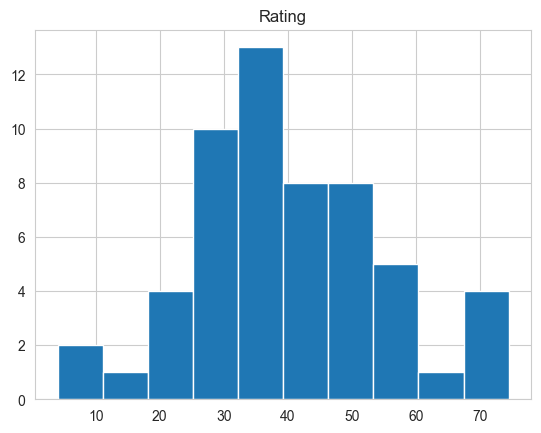

In [45]:
hist = y_train_cer.hist()

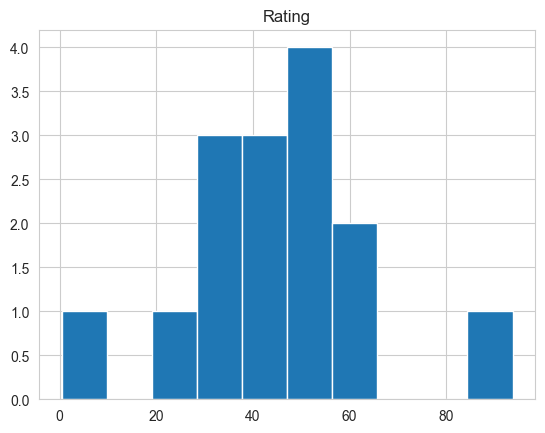

In [46]:
hist = y_test_cer.hist()

In [22]:
# data voor Kellogg's Coco pops and Boni Cereal flakes
cerealsBE= pd.DataFrame({'Calories':[116,124], 'Protein (g)':[1.7,2.6], 'Fat': [0.8,2.1], 'Sodium': [230,260], 'Dietary Fiber': [0.9,1.2]})

In [23]:
def minmax_norm_2(col1, col2):
    minimum = col2.min()
    range = col2.max() - minimum
    return (col1-minimum)/range

In [24]:
cerealsBE_norm = pd.DataFrame()
for column in cerealsBE:
    cerealsBE_norm[column] = minmax_norm_2(cerealsBE[column], x_cereals[column])

#cerealsBE_norm_trial = scaler.fit_transform(cerealsBE)

In [25]:
predicted_BE = model_cer.predict(cerealsBE_norm)
print(predicted_BE)

1/1 [==============================] - 0s 74ms/step
[[29.567198]
 [29.676422]]


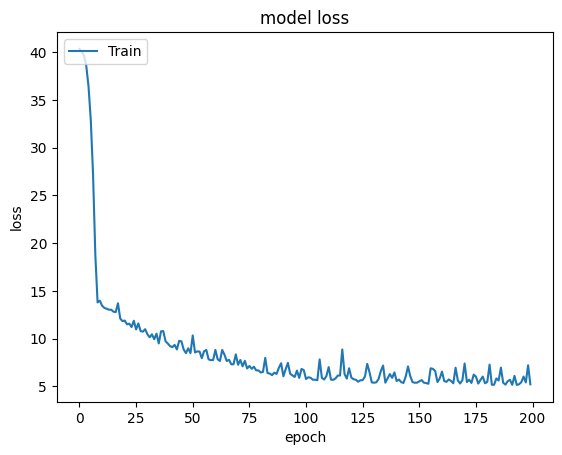

In [26]:
# summarize history for loss
plt.plot(history_cer.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

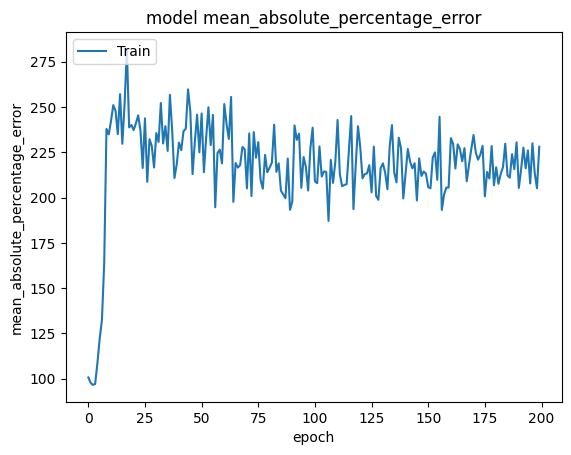

In [27]:
# summarize history for mean_absolute_percentage_error
plt.plot(history_cer.history['mean_absolute_percentage_error'])
plt.title('model mean_absolute_percentage_error')
plt.ylabel('mean_absolute_percentage_error')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# 6. QUESTIONNAIRE

Load data:

In [53]:
studenq = pd.read_csv('Questionnaire 21-22.csv', delimiter=';', decimal='.')
studenq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   First Letter         39 non-null     object 
 1   Number Languages     39 non-null     float64
 2   Writing Hand         39 non-null     object 
 3   Shoe Size            39 non-null     float64
 4   Length               39 non-null     int64  
 5   Blood Type           39 non-null     object 
 6   Resus Factor         39 non-null     object 
 7   Siblings             39 non-null     int64  
 8   Internet Purchase    39 non-null     object 
 9   Mobile Devices       39 non-null     int64  
 10  Leisure              39 non-null     object 
 11  Hours Math           39 non-null     object 
 12  Importance AI Study  39 non-null     object 
 13  Antwerp Address      39 non-null     object 
 14  Travel Distance      39 non-null     float64
 15  Travel Time          39 non-null     int64

In [54]:
### Question 1A ###
#Step 1: Upload the dataset and inspect the data
studenq = pd.read_csv('Questionnaire 21-22.csv', delimiter=';', decimal='.')
studenq.info()
studenq.isna().sum().sum()
studenq.describe()  #note: visualisation of values only for quantitative variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   First Letter         39 non-null     object 
 1   Number Languages     39 non-null     float64
 2   Writing Hand         39 non-null     object 
 3   Shoe Size            39 non-null     float64
 4   Length               39 non-null     int64  
 5   Blood Type           39 non-null     object 
 6   Resus Factor         39 non-null     object 
 7   Siblings             39 non-null     int64  
 8   Internet Purchase    39 non-null     object 
 9   Mobile Devices       39 non-null     int64  
 10  Leisure              39 non-null     object 
 11  Hours Math           39 non-null     object 
 12  Importance AI Study  39 non-null     object 
 13  Antwerp Address      39 non-null     object 
 14  Travel Distance      39 non-null     float64
 15  Travel Time          39 non-null     int64

,Number Languages,Shoe Size,Length,Siblings,Mobile Devices,Travel Distance,Travel Time,Biden
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,3.006410,42.423077,177.358974,1.846154,2.692308,10.815897,31.205128,4.358974
std,0.987566,2.896319,9.560024,1.203907,1.379432,14.377038,27.939954,1.662072
min,1.250000,36.500000,158.000000,0.000000,1.000000,0.100000,0.000000,2.000000
25%,2.000000,41.000000,170.000000,1.000000,2.000000,1.700000,10.000000,3.500000
50%,3.000000,43.000000,178.000000,2.000000,2.000000,2.600000,19.000000,4.000000
75%,4.000000,44.250000,185.000000,2.000000,3.000000,16.000000,45.500000,4.000000
max,6.000000,48.000000,195.000000,6.000000,7.000000,48.000000,90.000000,8.000000


In [55]:
# Step 2: Perform the needed data management manipulations
subset = studenq[['Hours Math','Mobile Devices', 'Siblings', 'Biden']].copy()
subset['Hours Math'] = pd.to_numeric(studenq['Hours Math'], errors = 'coerce') #text instead of a number
subset.loc[subset['Hours Math'] > 15, 'Hours Math'] = np.nan   # remove unreal values
subset.dropna(inplace=True)
subset = subset.reset_index() # if not impact on evaluation metrics
x_biden = subset[['Hours Math','Mobile Devices', 'Siblings']].copy()
y_biden = subset[['Biden']].copy()

In [56]:
# Step 3: Normalise the data
x_biden_norm = normalize_values(x_biden,decimal_scaling_norm) #home made function

NameError: name 'normalize_values' is not defined

In [ ]:
# Step 4: Split the dataset into a training dataset and a test dataset
x_train_biden,x_test_biden,y_train_biden,y_test_biden=train_test_split(x_biden_norm,y_biden,test_size=0.1)

In [ ]:
max_cat = y_biden['Biden'].max()+1
y_train_biden = to_categorical(y_train_biden, num_classes = max_cat, dtype ="int64")
y_test_biden = to_categorical(y_test_biden, num_classes = max_cat, dtype ="int64")

In [ ]:
# Step 5: Build the ANN-model
### Preparing the layers of the neural network
inputs_b = Input(shape=(3,))
x_b = Dense(2, activation='sigmoid')(inputs_b)
#x_b = Dense(6, activation='sigmoid')(inputs_b)
#x_b = Dense(12, activation='sigmoid')(x_b)
#x_b = Dense(24, activation='sigmoid')(x_b)
outputs_b = Dense(max_cat, activation='softmax')(x_b) #softmax: probabilities of belonging to one of the classes
### Build the neural network model
model_biden = Model(inputs_b, outputs_b, name='Biden')
model_biden.summary()
plot_model(model_biden, to_file='model_biden_plot.png', show_shapes=True, show_layer_names=True)
model_biden.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
# Step 6: Train the ANN-model
history_biden = model_biden.fit(
    x_train_biden, # training data
    y_train_biden, # training targets
    epochs=200)

In [ ]:
### Question 1B ###
#Step 7: Evaluate the quality of the ANN-model
predicted = pd.Series(np.argmax(model_biden.predict(x_train_biden),axis=1), name='predicted') #argmax: return the indices of the elements which corresponds with the largest value.
actual = pd.Series(np.argmax(y_train_biden,axis=1), name='actual')

In [ ]:
conf_mat = pd.crosstab(index=actual, columns=predicted)

In [ ]:
conf_mat = square_conf_mat (conf_mat)

In [ ]:
accuracy(conf_mat)
precision(conf_mat)
recall(conf_mat)
overviewmetrics(conf_mat, 1.0)

In [ ]:
mape = ((predicted - actual).abs()/actual).mean()
rmse = math.sqrt(((predicted - actual)**2).mean())

In [ ]:
#pip install pydot
#pip install graphviz
from keras.utils.vis_utils import plot_model
plot_model(model_biden, to_file='model_biden_plot.png', show_shapes=True, show_layer_names=True)